<a href="https://colab.research.google.com/github/gagan-iitb/DSP505/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


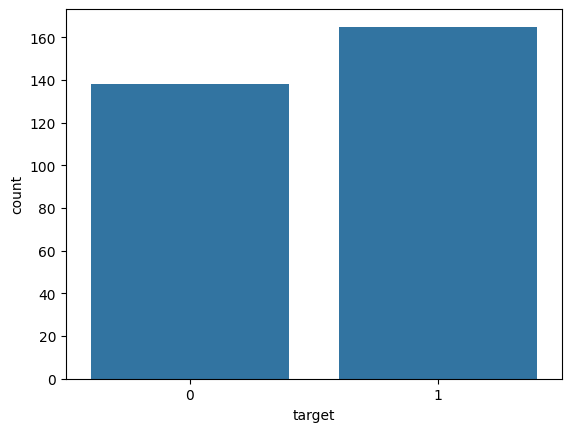

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Encode categorical variables if necessary
# For simplicity, assuming all variables are numerical or already encoded

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('target', axis=1)
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['target'] = df['target']


<Axes: >

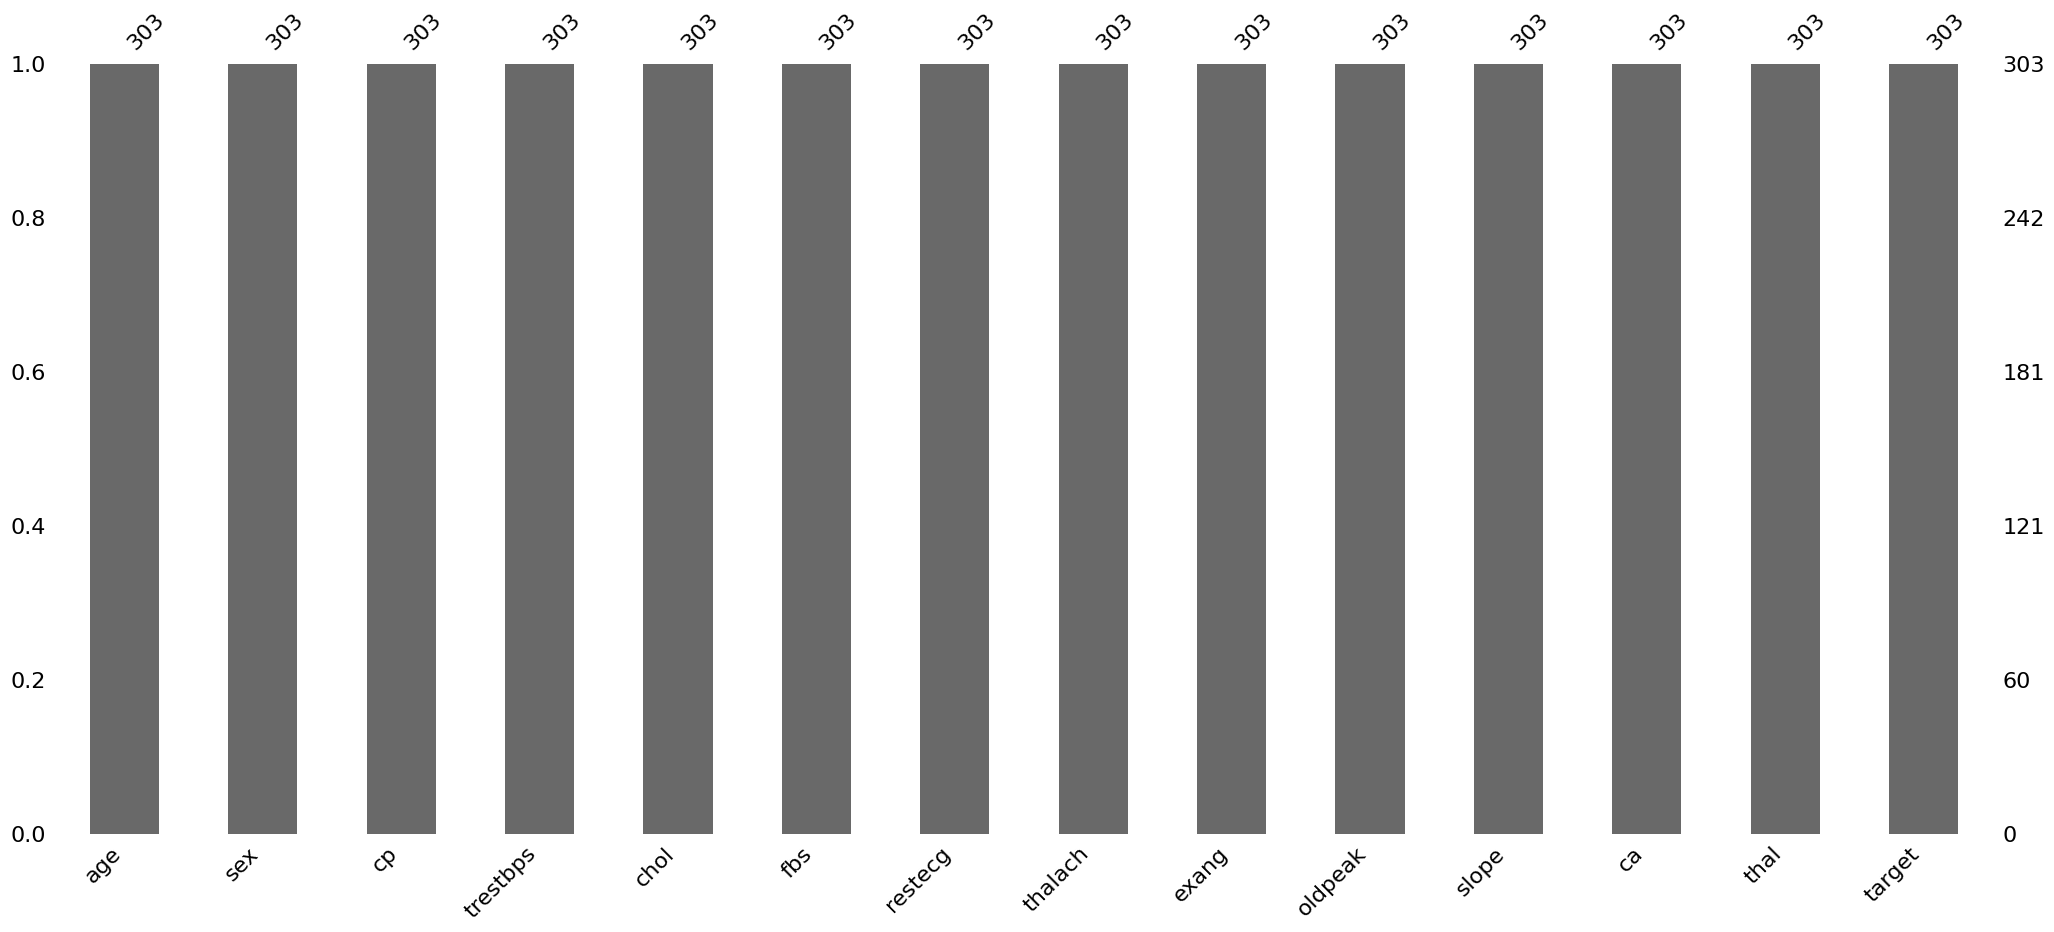

In [ ]:
#Visualizing Missing Data
import missingno as msno
msno.bar(df)

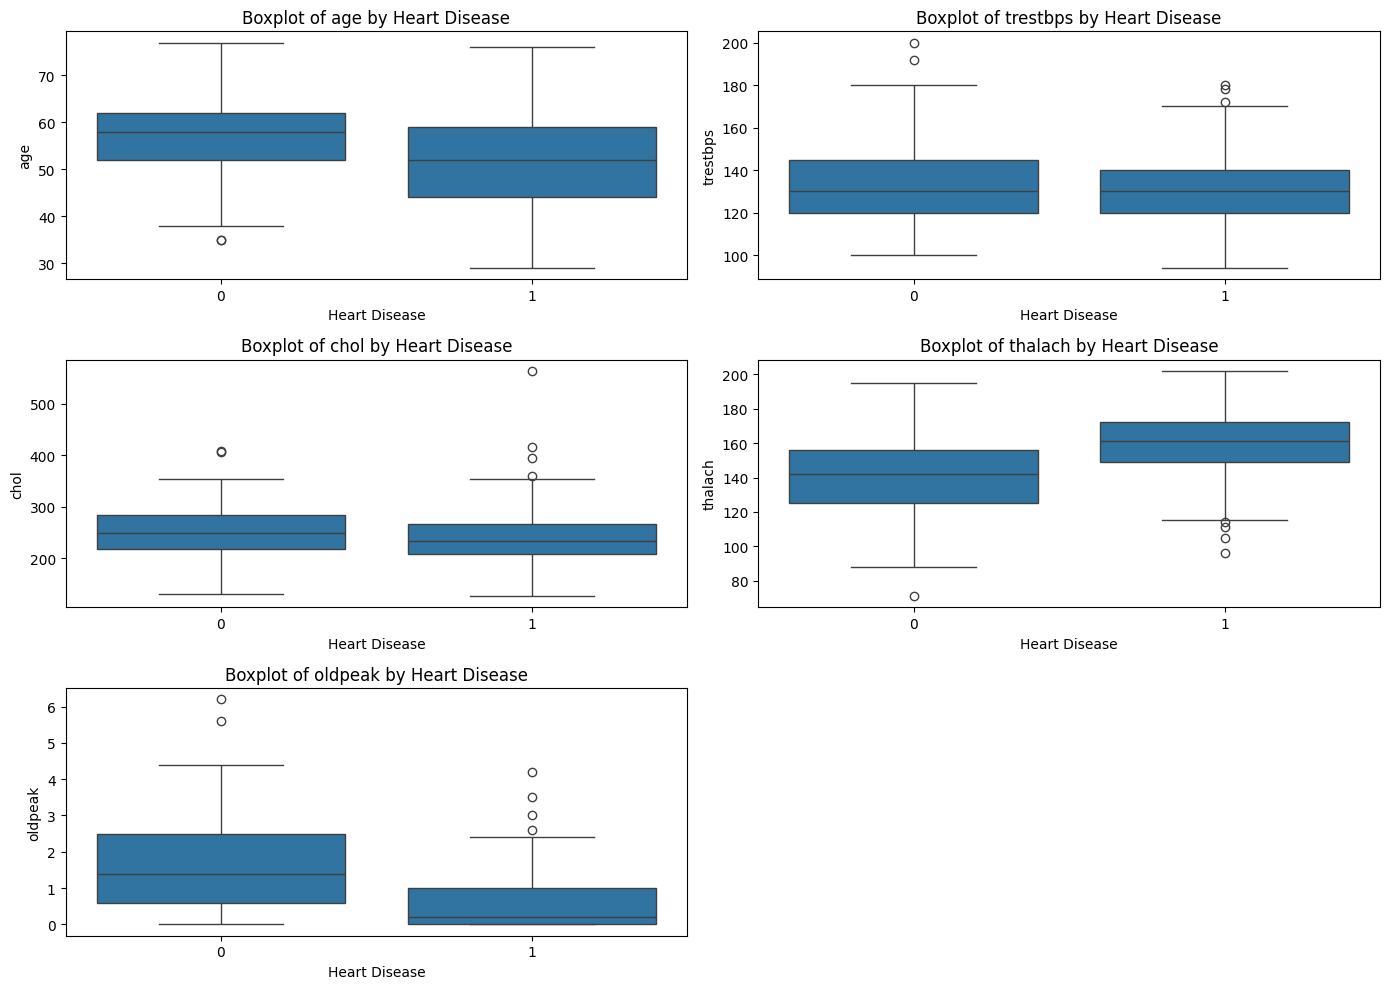

In [ ]:
#Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming these are the correct column names in your DataFrame
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

# Create boxplots for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



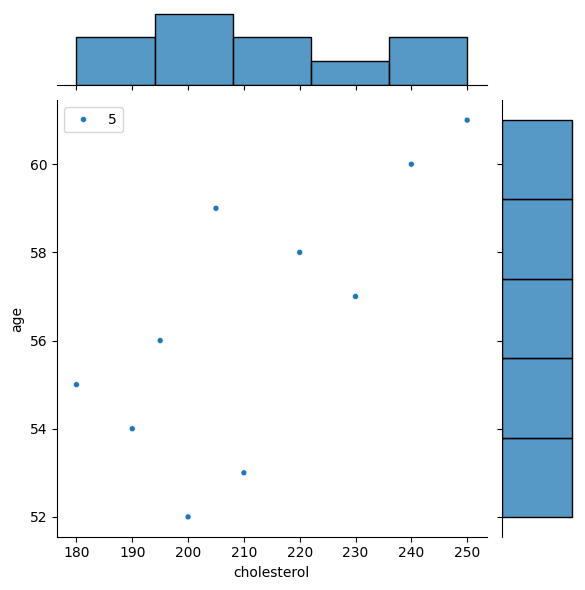

In [ ]:
# Create scatter plot

df.drop_duplicates(inplace=True)
sns.jointplot(x="cholesterol", y="age", data=df, size=5)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


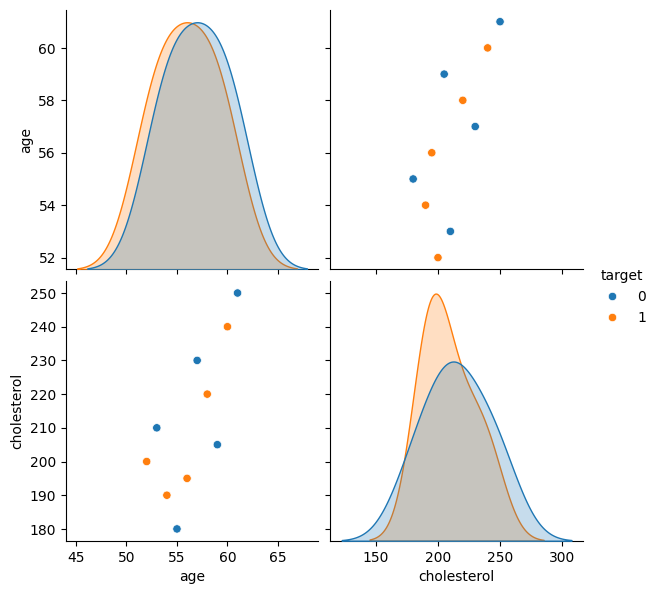

In [ ]:
#Pairplot
sns.pairplot(df, hue="target", size=3)

array([<Axes: title={'center': 'age'}, xlabel='[target]'>,
       <Axes: title={'center': 'cholesterol'}, xlabel='[target]'>],
      dtype=object)

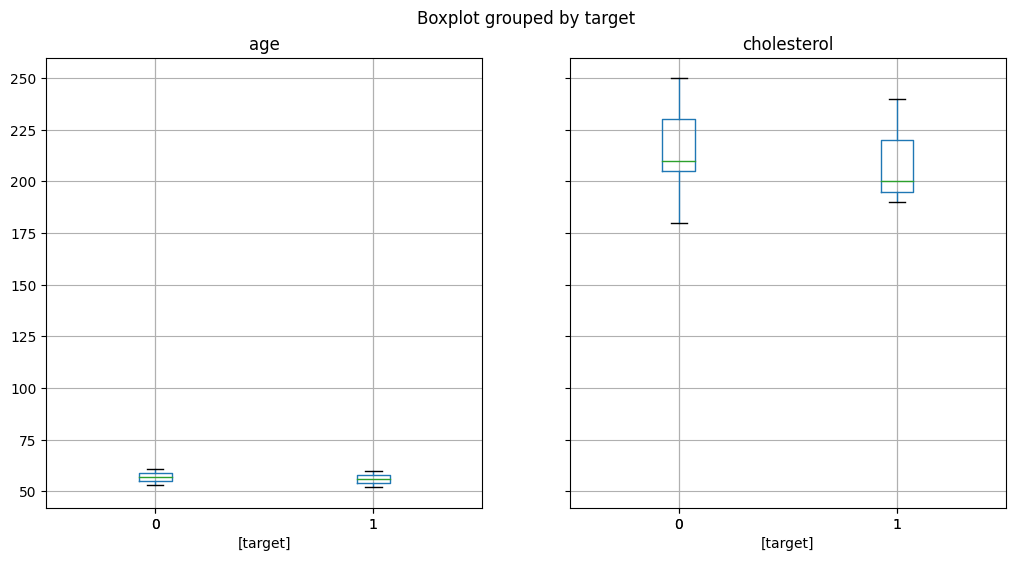

In [ ]:
#boxplot
df.boxplot(by="target", figsize=(12, 6))

<Axes: >

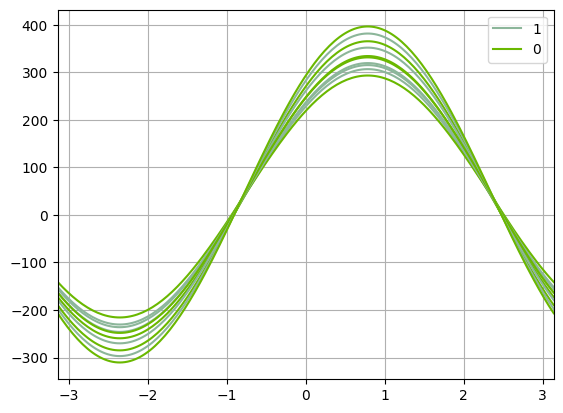

In [ ]:
#Andrews_curves
#Andrews curves are a technique for visualizing high-dimensional data by transforming it into a two-dimensional plot.
#Each line in the plot represents a data point, and the transformation makes it easier to visualize clusters or patterns in high-dimensional data.
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "target")

<Figure size 1500x1500 with 0 Axes>

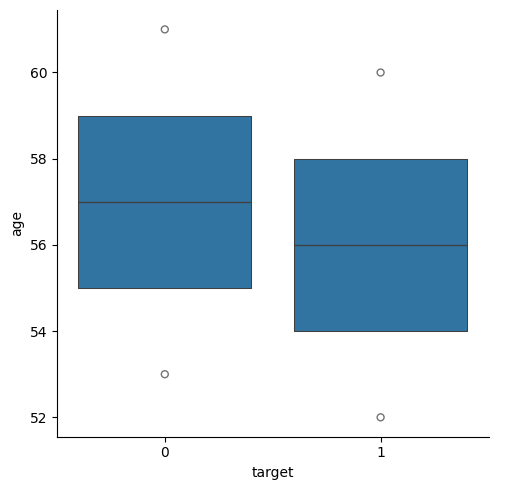

In [ ]:
#CategoricalPlot
#Creates a categorical plot with sns.catplot(), specifically a boxen plot.
#This type of plot is useful for visualizing the distribution of a numerical variable across different categories.
plt.figure(figsize=(15,15))
sns.catplot(x='target',y='age',data=df.sort_values('cholesterol',ascending=False),kind='boxen')

<Axes: xlabel='target', ylabel='age'>

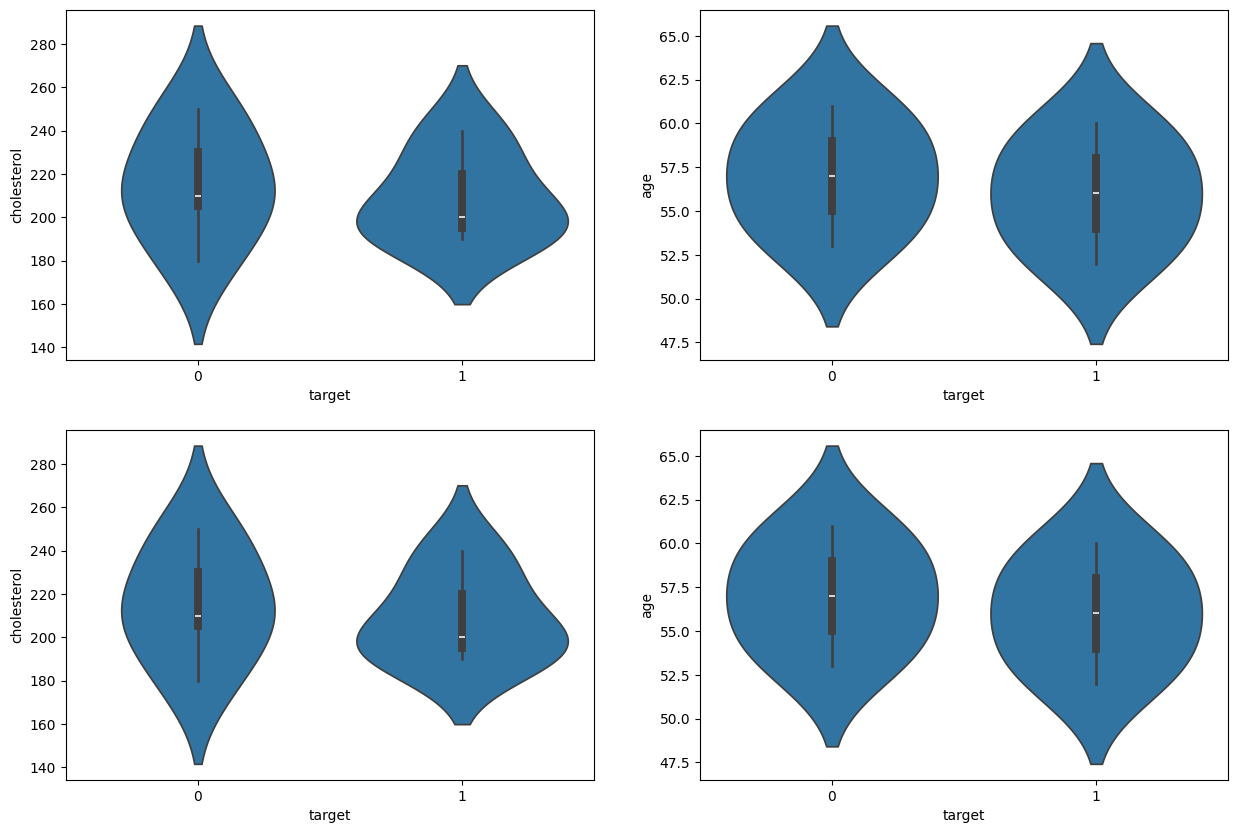

In [ ]:
#Violinplot

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='cholesterol',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='age',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='cholesterol',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='age',data=df)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Train models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

In [ ]:
# Make predictions
log_reg_pred = log_reg.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

# Evaluation
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine']
predictions = [log_reg_pred, knn_pred, dt_pred, rf_pred, svm_pred]

for model, pred in zip(models, predictions):
    print(f"--- {model} ---")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[25  4]
 [ 5 27]]


--- K-Nearest Neighbors ---
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Confusion Matrix:
[[27  2]
 [ 3 29]]


--- Decision Tree ---
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.

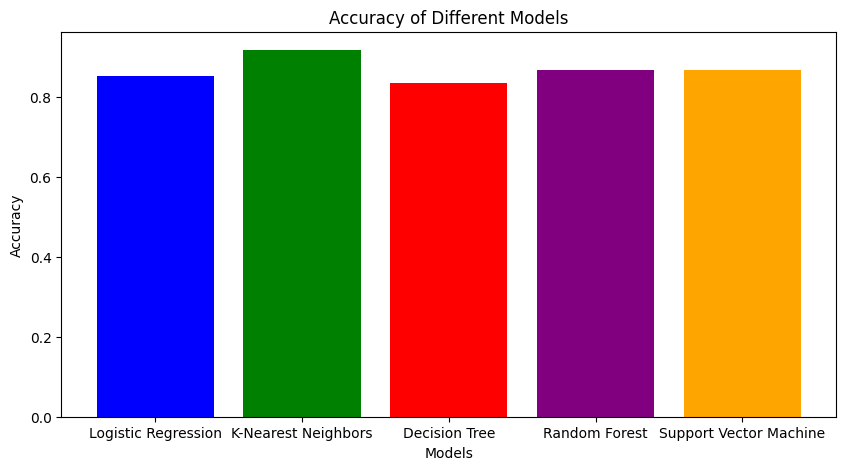

In [ ]:
#Accuracy Bar Plot
import matplotlib.pyplot as plt

# Accuracy for each model
accuracies = [
    accuracy_score(y_test, log_reg_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]

# Plotting accuracies
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


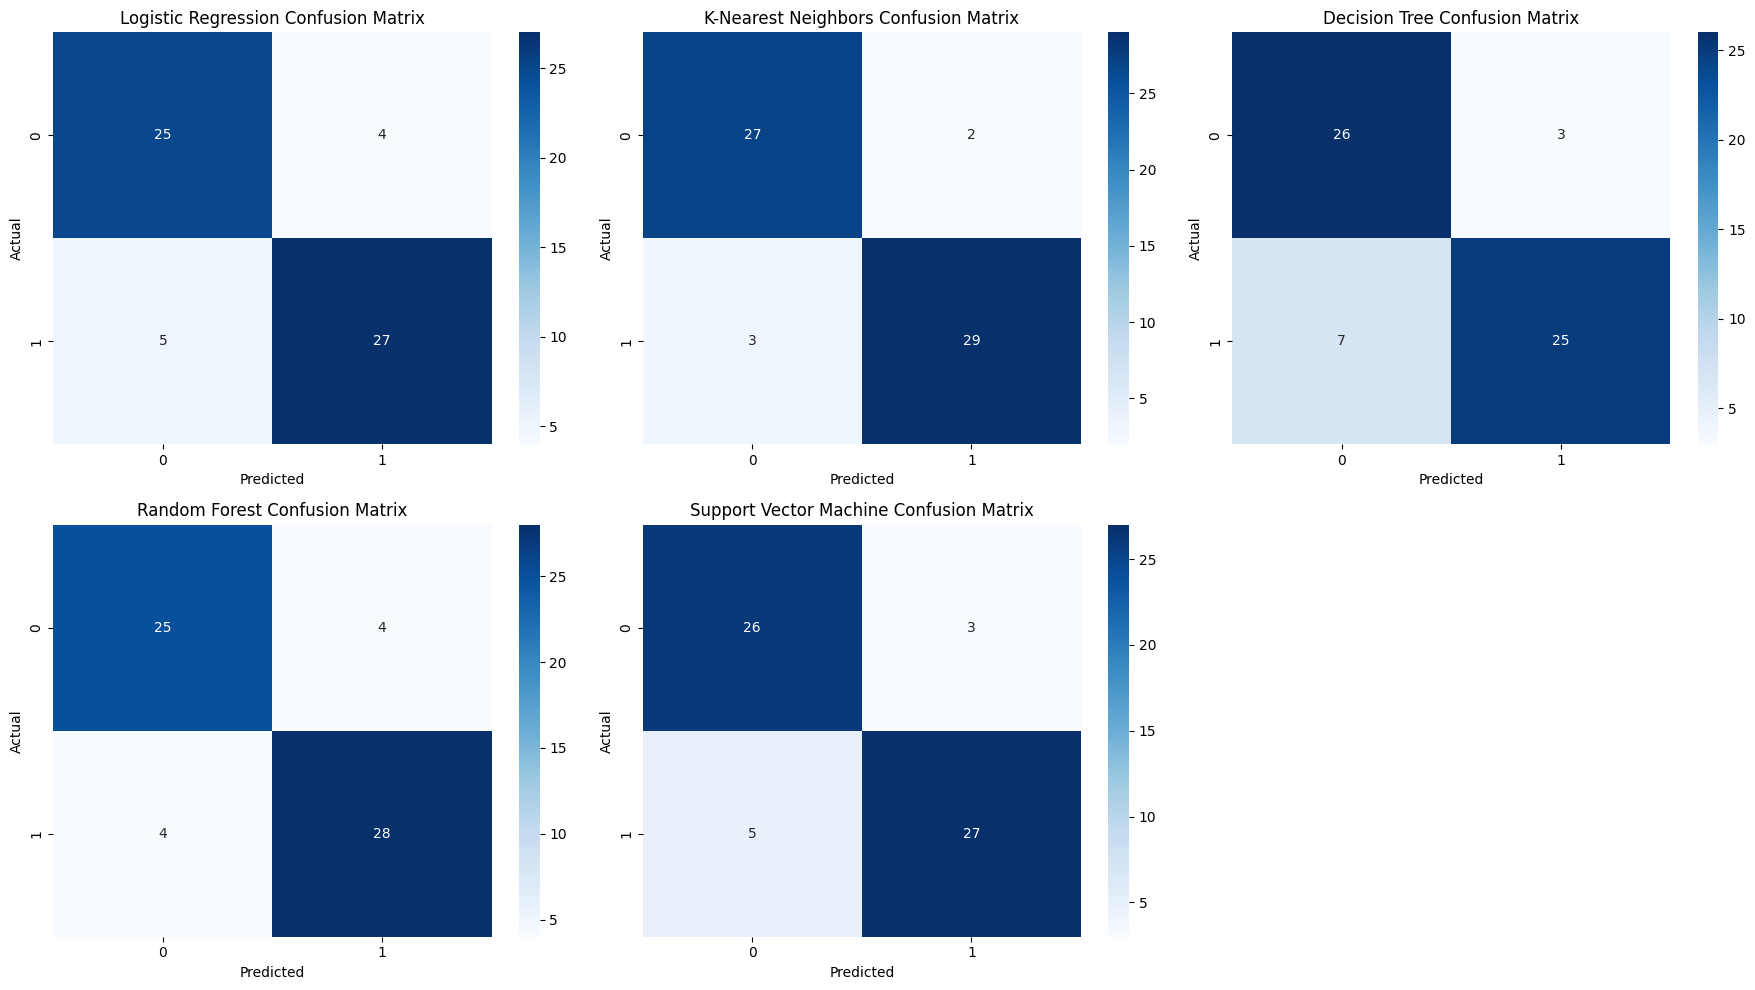

In [ ]:
#Confusion Matrix Heatmaps
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Confusion matrices
conf_matrices = [
    confusion_matrix(y_test, log_reg_pred),
    confusion_matrix(y_test, knn_pred),
    confusion_matrix(y_test, dt_pred),
    confusion_matrix(y_test, rf_pred),
    confusion_matrix(y_test, svm_pred)
]

# Plotting confusion matrix heatmaps
for ax, conf_matrix, model in zip(axes.flatten(), conf_matrices, models):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Hide the last subplot (unused)
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


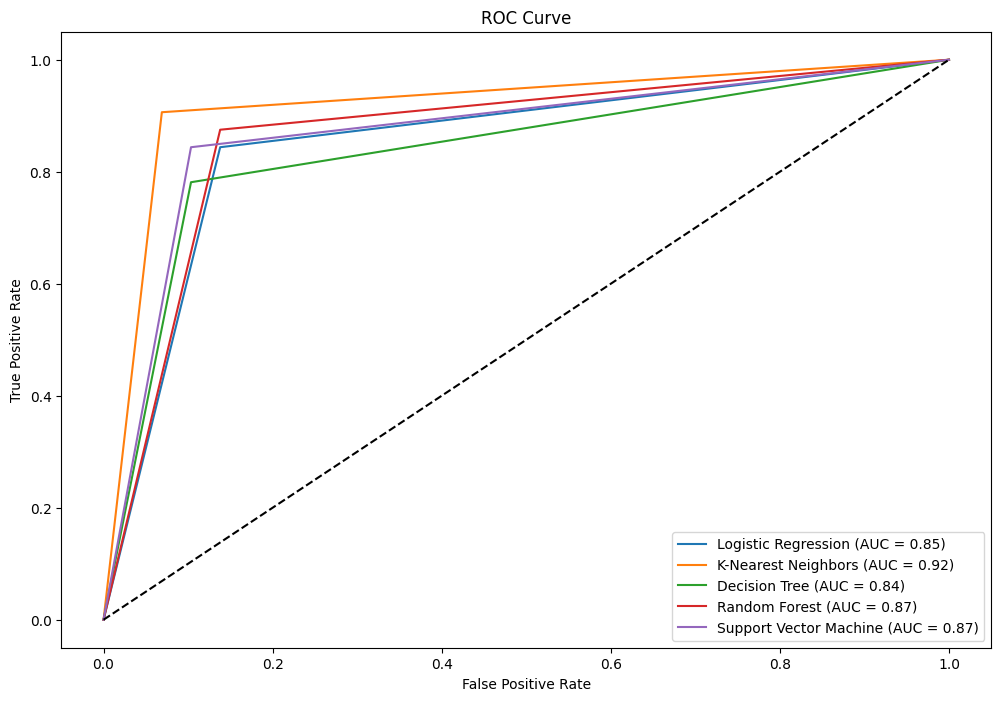

In [ ]:
#ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))

# Models and their predictions
model_preds = {
    'Logistic Regression': log_reg_pred,
    'K-Nearest Neighbors': knn_pred,
    'Decision Tree': dt_pred,
    'Random Forest': rf_pred,
    'Support Vector Machine': svm_pred
}

# Plot ROC curves
for model, pred in model_preds.items():
    fpr, tpr, _ = roc_curve(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
